<div style="width:100%; height:60px; background-color:aqua; display:flex">
<div style="display:flex; flex-direction:row; justify-content:center">
<h2 style="color:white"><strong>K nearest neighbors classification</strong></h2>
</div>
</div>

<h4 style="color:white"><p>The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. It is one of the popular and simplest classification and regression classifiers used in machine learning today.</p> 

<p>The kNN algorithm can be considered a voting system, where the majority class label determines the class label of a new data point among its nearest ‘k’ (where k is an integer) neighbors in the feature space. Imagine a small village with a few hundred residents, and you must decide which political party you should vote for. To do this, you might go to your nearest neighbors and ask which political party they support. If the majority of your’ k’ nearest neighbors support party A, then you would most likely also vote for party A. This is similar to how the kNN algorithm works, where the majority class label determines the class label of a new data point among its k nearest neighbors.</p>

<p>Let's take a deeper look with another example. Imagine you have data about fruit, specifically grapes and pears. You have a score for how round the fruit is and the diameter. You decide to plot these on a graph. If someone hands you a new fruit, you could plot this on the graph too, then measure the distance to k (a number) nearest points to decide what fruit it is. In the example below, if we choose to measure three points, we can say the three nearest points are pears, so I’m 100% sure this is a pear. If we choose to measure the four nearest points, three are pears while one is a grape, so we would say we are 75% sure this is a pear. We’ll cover how to find the best value for k and the different ways to measure distance later in this article.</p></h4>

<h2 style="color:aqua;font-style:italic;font-weight:bold">Intuition Behind KNN Algorithm
<h5 style="color:white">
<p>If we plot these points on a graph, we may be able to locate some clusters or groups. Now, given an unclassified point, we can assign it to a group by observing what group its nearest neighbors belong to. This means a point close to a cluster of points classified as ‘Red’ has a higher probability of getting classified as ‘Red’.

Intuitively, we can see that the first point (2.5, 7) should be classified as ‘Green’, and the second point (5.5, 4.5) should be classified as ‘Red’.</p>
</h5>
</h2>

<h2 style="color:aqua;font-style:italic;font-weight:bold">Why do we need a KNN algorithm?
<h5 style="color:white">
<p>(K-NN) algorithm is a versatile and widely used machine learning algorithm that is primarily used for its simplicity and ease of implementation. It does not require any assumptions about the underlying data distribution. It can also handle both numerical and categorical data, making it a flexible choice for various types of datasets in classification and regression tasks. It is a non-parametric method that makes predictions based on the similarity of data points in a given dataset. K-NN is less sensitive to outliers compared to other algorithms.</p>

<p>The K-NN algorithm works by finding the K nearest neighbors to a given data point based on a distance metric, such as Euclidean distance. The class or value of the data point is then determined by the majority vote or average of the K neighbors. This approach allows the algorithm to adapt to different patterns and make predictions based on the local structure of the data.</p> 
</h5>
</h2>

<div style="width:100%; height:auto; display:flex; flex-direction:row; justify-content:space-around;">
<img style="width:45%;height:auto; background-color:white" src="/home/ahmedunix/data_Science_Work/Machine_Learning/15_K_nearest_neighbors_classification/knn-1.png">
<img style="width:40%;height:auto; background-color:white" src="/home/ahmedunix/data_Science_Work/Machine_Learning/15_K_nearest_neighbors_classification/k-nearest-neighbor-algorithm-for-machine-learning2.png">
</div>

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf, keras
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

2024-09-30 22:34:46.264061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-30 22:34:46.312511: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-30 22:34:46.329267: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-30 22:34:48.136555: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['target'] = iris.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
df_setosa = df[df.flower_names == 'setosa']
df_versicolor = df[df.flower_names == 'versicolor']
df_virginica = df[df.flower_names == 'virginica']

Text(0, 0.5, 'sepal width (cm)')

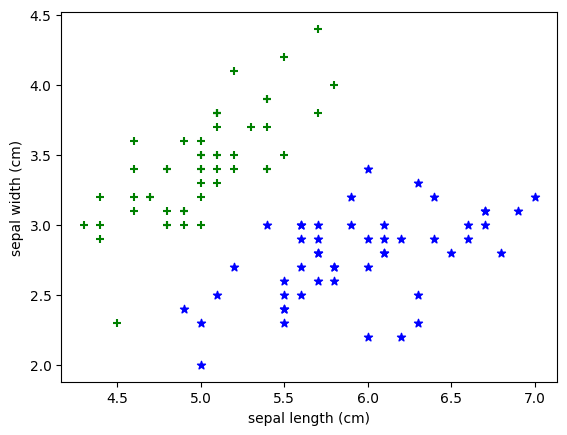

In [15]:
# Sepal Length Vs Sepal Width (Setosa VS Versicolor)

plt.scatter(df_setosa['sepal length (cm)'], df_setosa['sepal width (cm)'],color='green',marker='+')
plt.scatter(df_versicolor['sepal length (cm)'],df_versicolor['sepal width (cm)'],color='blue',marker='*')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal width (cm)')

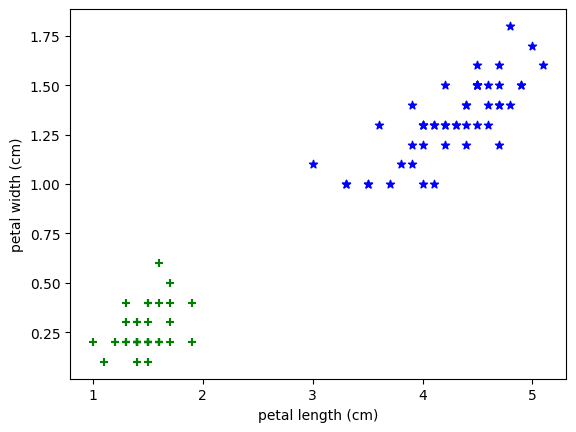

In [16]:
# Petal Length Vs Petal Width (Setosa VS Versicolor)

plt.scatter(df_setosa['petal length (cm)'], df_setosa['petal width (cm)'],color='green',marker='+')
plt.scatter(df_versicolor['petal length (cm)'],df_versicolor['petal width (cm)'],color='blue',marker='*')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [17]:
x = df.drop(columns=['target','flower_names'])
y = df.target

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.2)

In [19]:
len(x_train)

120

In [20]:
len(x_test)

30

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
y_predicted = knn.predict(x_test)

In [24]:
accuracy_score(y_test,y_predicted)

1.0

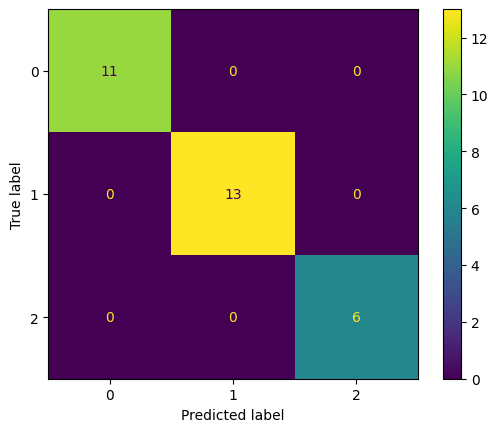

In [25]:
cm = confusion_matrix(y_test,y_predicted)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [26]:
print(classification_report(y_test,y_predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

